In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [2]:
np.random.seed(42)

data = pd.DataFrame({
    'study_hours': np.random.randint(1, 10, 200),
    'attendance': np.random.randint(50, 100, 200),
    'assignment_score': np.random.randint(40, 100, 200),
    'midterm_score': np.random.randint(30, 100, 200)
})

data['final_score'] = (
    0.3*data['study_hours'] +
    0.2*data['attendance'] +
    0.2*data['assignment_score'] +
    0.3*data['midterm_score'] +
    np.random.normal(0, 5, 200)
)


In [3]:
X = data.drop('final_score', axis=1)
y = data['final_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [5]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)


In [6]:
print("Linear Regression")
print("R2:", r2_score(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))

print("\nDecision Tree")
print("R2:", r2_score(y_test, dt_pred))
print("MSE:", mean_squared_error(y_test, dt_pred))


Linear Regression
R2: 0.565294882449052
MSE: 35.03944265068877

Decision Tree
R2: 0.24862667790152682
MSE: 60.564509976907075


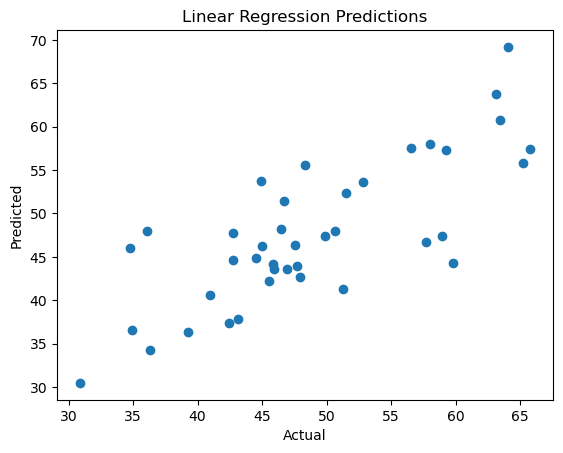

In [7]:
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Predictions")
plt.show()


In [8]:
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)


In [9]:
import streamlit as st
import pickle
import numpy as np

# Load model
model = pickle.load(open('model.pkl', 'rb'))

st.title("Student Performance Prediction App")

study_hours = st.number_input("Study Hours")
attendance = st.number_input("Attendance (%)")
assignment_score = st.number_input("Assignment Score")
midterm_score = st.number_input("Midterm Score")

if st.button("Predict"):
    input_data = np.array([[study_hours, attendance, assignment_score, midterm_score]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Final Score: {prediction[0]:.2f}")


2026-02-16 08:48:20.428 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.410 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-16 08:48:22.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.417 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-16 08:48:22.421 Thread 'MainThread': mi

In [13]:
import pickle
pickle.dump(best_model, open("model.pkl", "wb"))


In [12]:
# Assistant
# First, define your model before trying to save it
# For example, if you're using scikit-learn:
from sklearn.ensemble import RandomForestClassifier
# Train your model
best_model = RandomForestClassifier()
# Assuming you have X_train and y_train defined
# best_model.fit(X_train, y_train)

# Now you can save it
import pickle
pickle.dump(best_model, open("model.pkl", "wb"))